<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/world_pop_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://t3.ftcdn.net/jpg/01/62/59/04/360_F_162590489_5IcesYmlOK0RC4T4r5lydft8aQmpCwI7.jpg" width='150' height='140' align='left'> 

#  OUR WORLD IN NUMBERS 
##### This is an EDA on World Population (1950-2022)
###### World Population Clock: 7.98 Billion People (Sep 2022)  


***
<h1 style="color: #003333; text-align:center; font-size:3em" >CONTENTS</h1>

***

* [Objectives](#obj) 
* [Import Libraries](#import)
* [Read Dataset](#read)
* [Data Cleaning](#clean)
* [Exploratory Data Analysis (EDA)](#eda)
* [Data Visualization](#visual)
    * [Population Growth Rate (2022)](#growth)
    * [AFRICA'S Population Growth Rate Over The Years](#africa_growth)
    * [World Population Growth Rate  (1950 - 2022)](#yearly_growth)
    * [Top 10 countries with the least population](#top_country)
    * [Top 10 countries with the most population](#top_country)
    * [Year to year population change](#pop_yearly)
    * [World Population Density](#density)
    * [Gender Ratio](#mperf)
    * [Migration Rate](#MR)
    * [Fertility Rate](#FR)
    * [Effective Family Planning](#FP)
* [Conclusion](#conclusion)
***

<a id = "obj"></a>
***
<h1 style="color: #003333; text-align:center; font-size:3em" >OBJECTIVES</h1>

***

* ## Explore the population data on
    * ### Growth Rate
    * ### Population density
    * ### Gender Ratio
    * ### Migration
    * ### Replacement level fertility
    * ### Effective Family Planning
    * ### Year wise population changes
    * ### Teen Pregnancies

<a id = 'import' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" >Import Libraries</h1>


In [4]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Created wheel for country-converter: filename=country_converter-0.8.0-py3-none-any.whl size=55657 sha256=955f498c7b0bc2c526d0de94c0148db896473c0ce684c40cfaa79a80096e6b4d
  Stored in directory: /root/.cache/pip/wheels/c2/5a/f6/7187fa51e18f2ed105833a7f5c44a2475ace0c96e19118e608
Successfully built country-converter


In [5]:
#Importing libraries
from urllib.request import urlretrieve
import zipfile

import matplotlib.pyplot as plt

import pandas as pd 
import seaborn as sns
import numpy as np

import missingno as msno
import country_converter

import plotly.express as px


%matplotlib inline

 <h1 style="color: #003333; text-align:center; font-size:3em" >LOAD DATASET</h1>


<a id = 'read'></a>

Downloaded world Population data from https://population.un.org/wpp/Download/Standard/CSV/

In [2]:
url = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2022_Demographic_Indicators_Medium.zip'
extract_dir = "world_pop_un_dataset"

zip_path, _ = urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)

/content/world_pop_un_dataset/WPP2022_Demographic_Indicators_Medium.csv

Loaded and unziped csv file in pandas DataFrame

In [16]:
path = '/content/'+extract_dir+'/WPP2022_Demographic_Indicators_Medium.csv'
data = pd.read_csv(path,dtype={'Notes': object})
#dtype={'Notes': object} added since it was throwing dtype error because nan, int and string were present in column.

In [17]:
#set_option required because number of columns is higher
pd.set_option('display.max_columns',None) 
data.tail(1)

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,MedianAgePop,NatChange,NatChangeRT,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CBR,TFR,NRR,MAC,SRB,Deaths,DeathsMale,DeathsFemale,CDR,LEx,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,IMR,LBsurvivingAge1,Under5Deaths,Q5,Q0040,Q0040Male,Q0040Female,Q0060,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
43471,290,876,2,WLF,WF,876.0,4,Country/Area,957,Wallis and Futuna Islands,2,Medium,2101,9.864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#lets check how many unique values we have (number of location's ids)
print('Number of unique LocID: ', data.LocID.unique().shape[0])

Number of unique LocID:  286


In [19]:
data.columns

Index(['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'Location', 'VarID', 'Variant',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'],
      dtype='object')

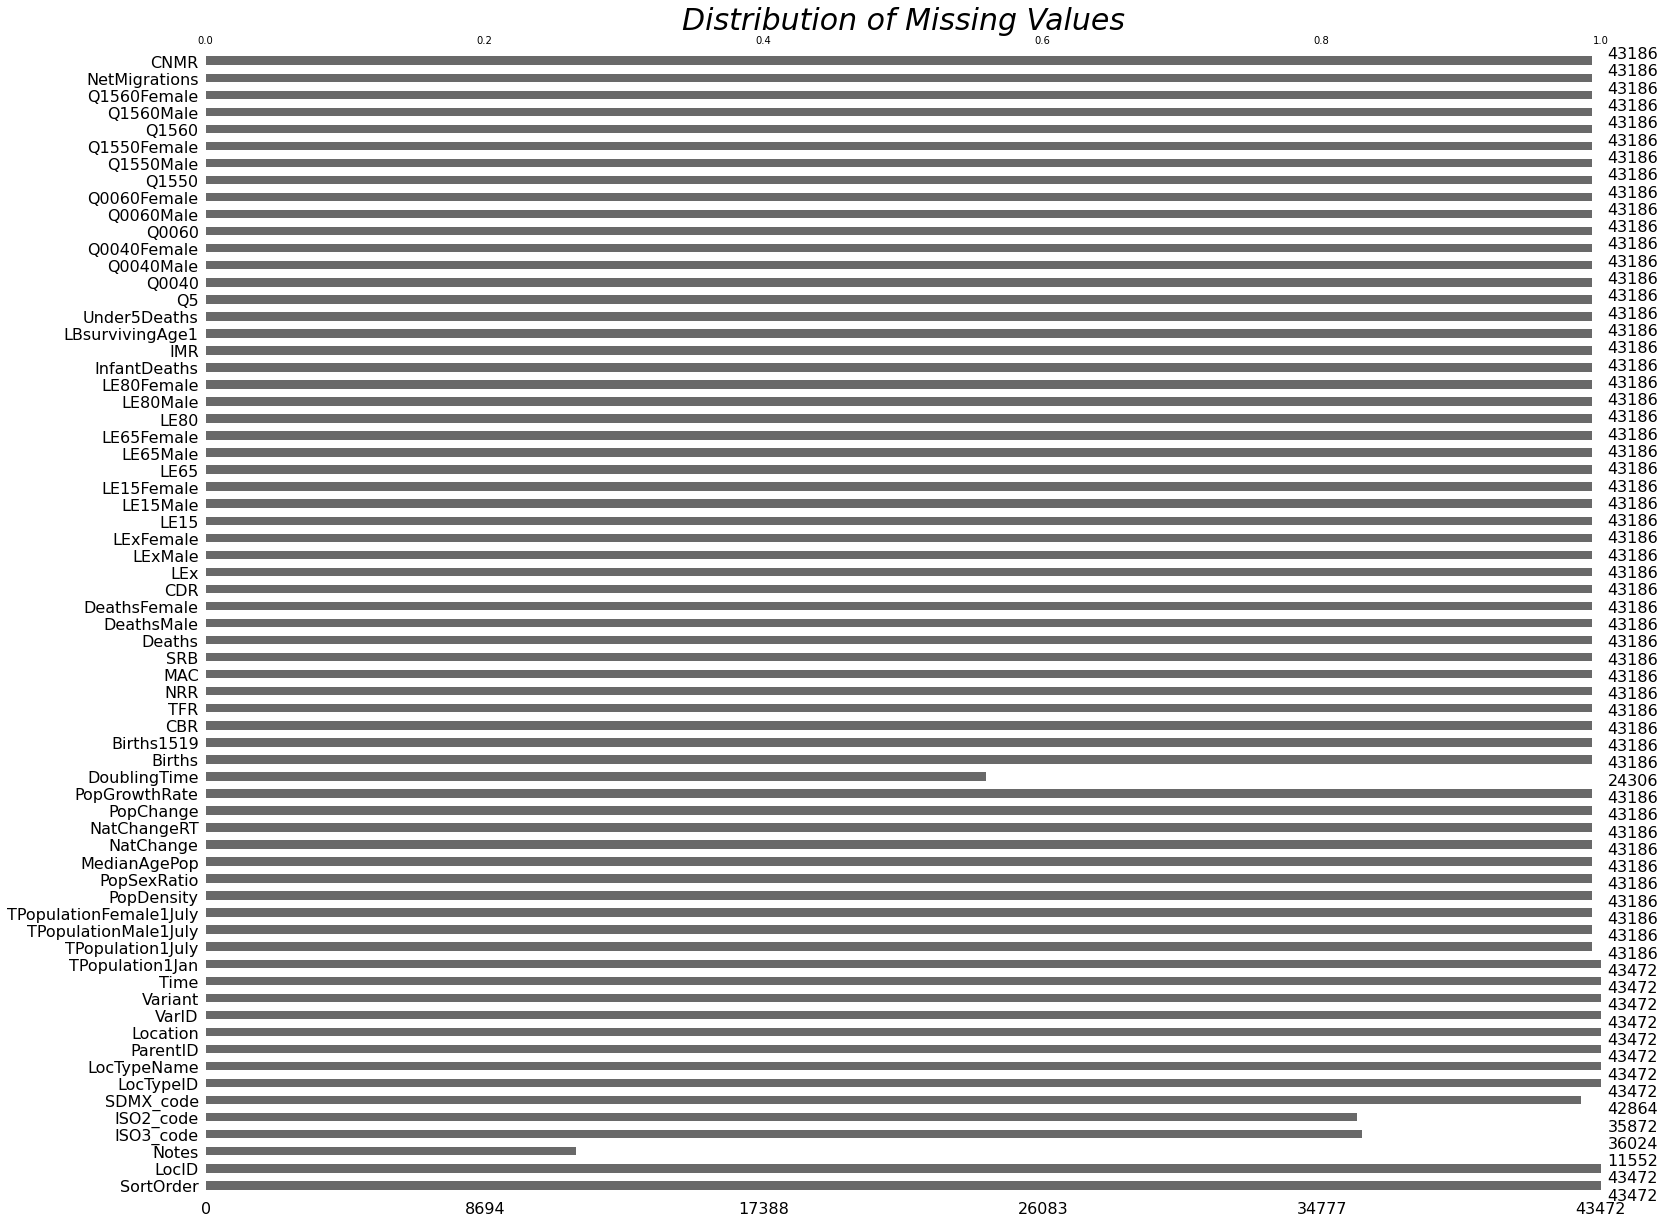

In [20]:
msno.bar(data)
plt.title('Distribution of Missing Values' ,fontsize=30, fontstyle= 'oblique');

Looks like there's a bit of missing data we'll need to take care of it 

***
<h1 style="color: #003333; text-align:center; font-size:3em" >DATA CLEANING</h1>

***
<a id = 'clean'></a>

After Looking at data, dropping some columns with excess data. 

In [21]:
# data.drop(columns=['PopChange','NatChange','TPopulationMale1July','TPopulationFemale1July','SDMX_code','ISO2_code','Notes',
#                    'LocTypeID', 'ParentID', 'SortOrder', 'VarID', 'Variant','DoublingTime'], inplace= True)

data = data[['LocID', 'ISO3_code', 'LocTypeName', 'Location',
       'Time', 'TPopulation1Jan', 'TPopulation1July', 'PopDensity',
       'PopSexRatio', 'MedianAgePop', 'NatChangeRT', 'PopGrowthRate',
       'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'NetMigrations', 'CNMR']]

### Following conventions  for column names are currently present in loaded dataset:

* LocID (numeric): numeric code for the location; for countries and areas, it follows the ISO 3166-1 numeric standard
* 'ISO3_code'
* LocTypeName (string): type of location
* Location (string): name of the region, subregion, country or area
* Time (numeric): year the data refers to
* Total Population, as of 1 January (thousands)
* Total Population, as of 1 July (thousands)
* Population Density, as of 1 July (persons per square km)
* Population Sex Ratio, as of 1 July (males per 100 females)
* Median Age, as of 1 July (years)
* Natural Change Rate, Births minus Deaths
* Population Growth Rate (percentage)
* Births (thousands)
* Births by women aged 15 to 19 (thousands)
* Crude Birth Rate (births per 1,000 population)
* Total Fertility Rate (live births per woman)
* Net Reproduction Rate (surviving daughters per woman)
* Mean Age Childbearing (years)
* Sex Ratio at Birth (males per 100 female births)
* Net Number of Migrants (thousands)
* Net Migration Rate (per 1,000 population)

In [22]:
data.LocTypeName.unique()

array(['World', 'SDG region', 'Development group', 'Income group',
       'Geographic region', 'Subregion', 'Country/Area'], dtype=object)

Splitting data into two, first df with Location type Country/Area and till year 2022 , second df with rest Location types

In [23]:
pop = data[data.LocTypeName == 'Country/Area']
pop = pop[pop.Time <2023 ]
pop_other_loc_type = data[data.LocTypeName != 'Country/Area']

In [24]:
pop.isna().values.sum()

0

pop dataframe has no missing values now

Our data doesn't have continent column so let's remedy that


In [25]:
pop['Continent'] = country_converter.convert(names=pop['ISO3_code'], to="continent")


In [27]:
#save clean data and use this clean data for further analysis
path2 = '/content/'+extract_dir+'/WPP_clean.csv'
pop.to_csv(path2,sep=",",index=False)

***
<a id = 'eda' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" >Exploratory Data Analysis</h1>

***

In [28]:
#load data to new pd object
#extract_dir = "world_pop_un_dataset"
pop = pd.read_csv('/content/'+extract_dir+'/WPP_clean.csv')
pop.head()

,LocID,ISO3_code,LocTypeName,Location,Time,TPopulation1Jan,TPopulation1July,PopDensity,PopSexRatio,MedianAgePop,NatChangeRT,PopGrowthRate,Births,Births1519,CBR,TFR,NRR,MAC,SRB,NetMigrations,CNMR,Continent
0,108,BDI,Country/Area,Burundi,1950,2229.322,2254.113,86.8637,91.9472,18.3147,27.788,2.200,116.224,11.270,51.334,6.9229,2.0471,30.995,102.5,-13.343,-5.893,Africa
1,108,BDI,Country/Area,Burundi,1951,2278.903,2303.248,88.7571,92.1448,18.0842,26.799,2.114,117.067,11.370,50.678,6.9139,2.0584,30.996,102.5,-13.217,-5.721,Africa
2,108,BDI,Country/Area,Burundi,1952,2327.593,2351.536,90.6179,92.3191,17.8744,26.118,2.036,117.770,11.325,49.933,6.9002,2.0621,31.026,102.5,-13.715,-5.815,Africa
3,108,BDI,Country/Area,Burundi,1953,2375.478,2399.099,92.4508,92.4880,17.6693,25.844,1.969,119.013,11.424,49.448,6.9146,2.0779,31.030,102.5,-14.962,-6.216,Africa
4,108,BDI,Country/Area,Burundi,1954,2422.721,2446.758,94.2874,92.6503,17.4706,25.536,1.965,119.972,11.635,48.883,6.9170,2.0918,31.036,102.5,-14.599,-5.948,Africa


In [29]:
#prelim statiscal data
pop.describe()

,LocID,Time,TPopulation1Jan,TPopulation1July,PopDensity,PopSexRatio,MedianAgePop,NatChangeRT,PopGrowthRate,Births,Births1519,CBR,TFR,NRR,MAC,SRB,NetMigrations,CNMR
count,17301.000000,17301.000000,1.730100e+04,1.730100e+04,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000,17301.000000
mean,440.282700,1986.000000,2.114451e+04,2.130435e+04,308.872539,100.176559,23.750701,17.570911,1.739045,534.857871,64.441380,28.761986,4.001110,1.618907,28.774251,105.055766,0.000046,-0.052219
std,251.624288,21.071916,9.437514e+04,9.497185e+04,1565.163926,13.640663,8.032042,11.044435,1.971107,2239.799247,294.561645,13.371750,2.021823,0.678922,1.454559,1.925580,138.916689,16.512165
min,4.000000,1950.000000,5.080000e-01,5.100000e-01,0.048800,63.600700,13.078300,-62.082000,-71.689000,0.002000,0.000000,4.089000,0.745500,0.282300,23.685000,96.700000,-6673.580000,-526.323000
25%,226.000000,1968.000000,2.146090e+02,2.180700e+02,18.313100,95.180600,17.135500,8.524000,0.698000,5.471000,0.510000,16.672000,2.141300,1.007600,27.755000,103.800000,-9.523000,-3.860000
50%,440.000000,1986.000000,3.121132e+03,3.147168e+03,65.363600,98.628800,20.842500,18.839000,1.689000,73.817000,6.225000,27.831000,3.583600,1.577000,28.887000,105.000000,-0.178000,-0.343000
75%,659.000000,2004.000000,1.068881e+04,1.078272e+04,156.742800,102.156400,29.465100,26.742000,2.655000,349.163000,36.015000,41.106000,5.936100,2.180800,29.815000,106.100000,2.903000,2.359000
max,894.000000,2022.000000,1.425925e+06,1.425893e+06,24879.530200,327.456200,57.718800,43.707000,36.299000,33567.340000,5714.733000,59.416000,8.863700,3.509900,33.023000,128.200000,3366.387000,415.239000


In [30]:
print(f'''Mean Male per 100 Female ratio is {pop.describe().PopSexRatio['mean']} 
Mean Median Age is {pop.describe().MedianAgePop['mean']} 
Max population has been {(pop.describe().TPopulation1Jan['max']):6e} billion
''')

Mean Male per 100 Female ratio is 100.17655898502976 
Mean Median Age is 23.750701236922723 
Max population has been 1.425925e+06 billion



Set matplotlib style

In [31]:
sns.set_theme(style="whitegrid")


<a id = 'growth' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" >Population Growth Rate (2022)</h1>

In [32]:
pop_2022 = pop[pop.Time == 2022]

In [33]:
Growth_continent_2022 = pop_2022.groupby(pop_2022.Continent)[['PopGrowthRate']].mean().sort_values("PopGrowthRate", ascending=False)
Growth_continent_2022

,PopGrowthRate
Continent,
Africa,2.040552
Asia,0.940314
Oceania,0.871522
America,0.543036
Europe,0.431240


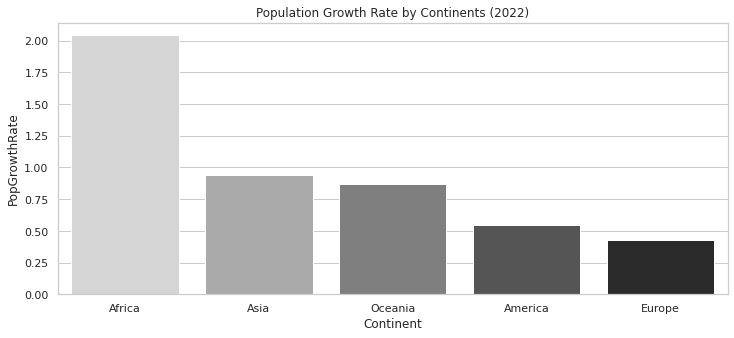

In [34]:
plt.figure(figsize=(12,5))
plt.title('Population Growth Rate by Continents (2022)')

sns.barplot(y = Growth_continent_2022.PopGrowthRate, x=Growth_continent_2022.index, palette='binary');


###### Insight

Africa's population growth rate is roughly 2%. (Highest among the continents)

Lets check Africa's population growth rate  over the years

<a id = 'africa_growth' ></a>
<h1 style="color: #003333; text-align:center; font-size:2em" >AFRICA'S Population Growth Rate Over The Years </h1>

In [35]:
Africa_growth_rate = pop[pop.Continent == 'Africa']
Africa_growth_rate = Africa_growth_rate.groupby(Africa_growth_rate.Time)[['PopGrowthRate']].mean()

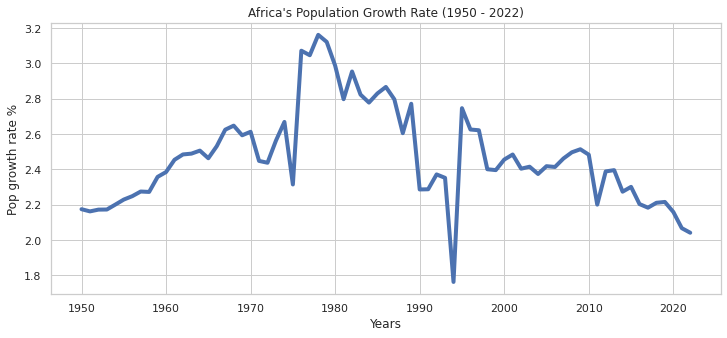

In [36]:
plt.figure(figsize=(12,5))
plt.title('Africa\'s Population Growth Rate (1950 - 2022)')
sns.lineplot(x = Africa_growth_rate.index, y = Africa_growth_rate.PopGrowthRate,linewidth = 4 )
plt.xlabel('Years')
plt.ylabel('Pop growth rate %');



In [37]:
africa_pop =  Africa_growth_rate.sort_values(by=['PopGrowthRate'])
i1 = africa_pop.first_valid_index()
i2 = africa_pop.last_valid_index()
africa1 = africa_pop.loc[i1,'PopGrowthRate']
africa2 = africa_pop.loc[i2,'PopGrowthRate']
print(i1,africa1,'lowest growth rate')
print(i2,africa2,'highest growth rate')

1994 1.7616551724137932 lowest growth rate
1978 3.162293103448276 highest growth rate


###### Insight
* Hit a low point in 1994 with 1.76 %
    * 1994 Rwandan genocide

* Hit peak in 1978 with 3.162293 %

<a id = 'yearly_growth' ></a>
<h1 style="color: #003333; text-align:center; font-size:2em" >World Population Growth Rate  (1950 - 2022) </h1>

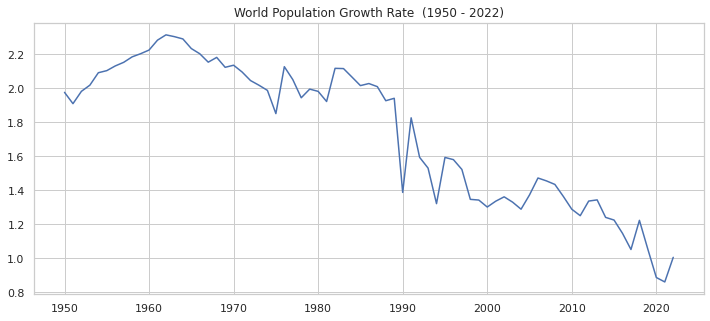

In [38]:
plt.figure(figsize=(12,5))
plt.title('World Population Growth Rate  (1950 - 2022)')
plt.plot(pop.groupby(pop.Time)[['PopGrowthRate']].mean());

###### Insight
Clearly Effect of Covid can be seen as

Growth rate dropped below 0.9 % in 2020 and 2021

Population growth rate has been declining, thus it can be said that population in 21st century will grow albiet with a slower rate. 

In [39]:
least =  pop_2022.sort_values('PopGrowthRate').first_valid_index()
least = pop_2022.loc[least,'Location']
most =  pop_2022.sort_values('PopGrowthRate').last_valid_index()
most = pop_2022.loc[most,'Location']

print(least,' has the lowest population growth rate, while ',most,' has the highest population growth rate.')

Ukraine  has the lowest population growth rate, while  Republic of Moldova  has the highest population growth rate.


<a id = 'top_country' ></a>
<h1 style="color: #003333; text-align:center; font-size:2em" >TOP COUNTRIES BY   </h1>
<h3 style="color: #003333; text-align:center; font-size:1.3em" >LEAST POPULATION & MOST POPULATION (2022)   </h3>

In [40]:
largest_pop = pop_2022.sort_values(by=['TPopulation1July'], ascending=False )
least_pop = largest_pop.tail(10)[::-1]
largest_pop = largest_pop.head(10)

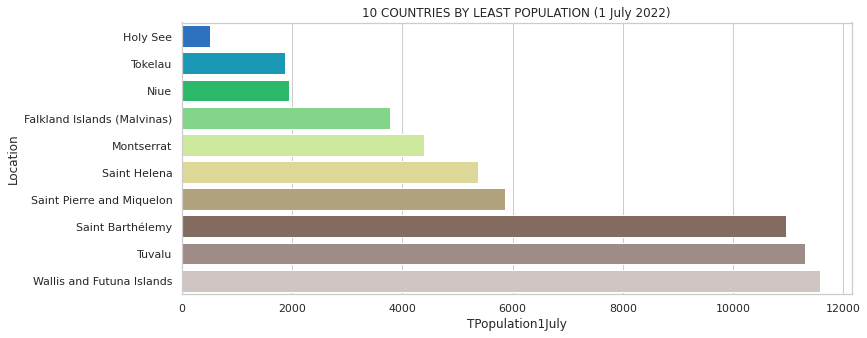

In [41]:
plt.figure(figsize=(12,5))
plt.title('10 COUNTRIES BY LEAST POPULATION (1 July 2022)')
sns.barplot(y=least_pop.Location,x=least_pop.TPopulation1July*1000, palette='terrain');

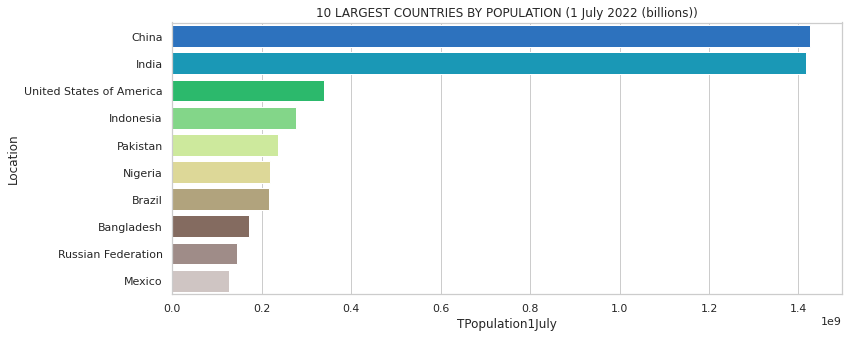

In [42]:
plt.figure(figsize=(12,5))
plt.title('10 LARGEST COUNTRIES BY POPULATION (1 July 2022 (billions))')
sns.barplot(y=largest_pop.Location,x=largest_pop.TPopulation1July*1000, palette='terrain');

##### Insight

China and India are two countries with the largest population in the world (each country has more than 1.4 billion people).


<a id = 'pop_yearly' ></a>
<h1 style="color: #003333; text-align:center; font-size:2em" > World Population Change (1950-2022)   </h1>

Choropleth Map is used to show how world population has changed throughout the history.


In [43]:
px.choropleth(pop.sort_values('Time'), 
              locations = 'ISO3_code',
              color="TPopulation1July",
              animation_frame='Time',
              color_continuous_scale ='aggrnyl', 
              title='World population change through years' ,
              height=500)

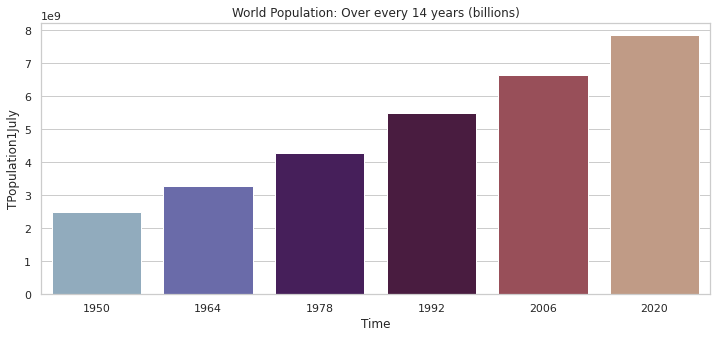

In [44]:
Pop_past_present = pop.groupby(pop.Time)[['TPopulation1July']].sum()
Pop_past_present = Pop_past_present[::14] #got 14 by taking mean of cummulative difference of pop
plt.figure(figsize=(12,5))
plt.title('World Population: Over every 14 years (billions)')
sns.barplot(x=Pop_past_present.index, y=Pop_past_present.TPopulation1July*1000, palette='twilight' );

###### Insight
* We add a billion every 14 years.

In [45]:
Pop_past_present = pop.groupby(pop.Time)[['TPopulation1July']].sum()
year = 1998
print('World Population the year I was born ',year,', was', Pop_past_present.TPopulation1July.at[year]*1000/10**9, ' billion.')

World Population the year I was born  1998 , was 5.98731247  billion.


<a id = 'density' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" >World Population Density (people/km2)</h1>

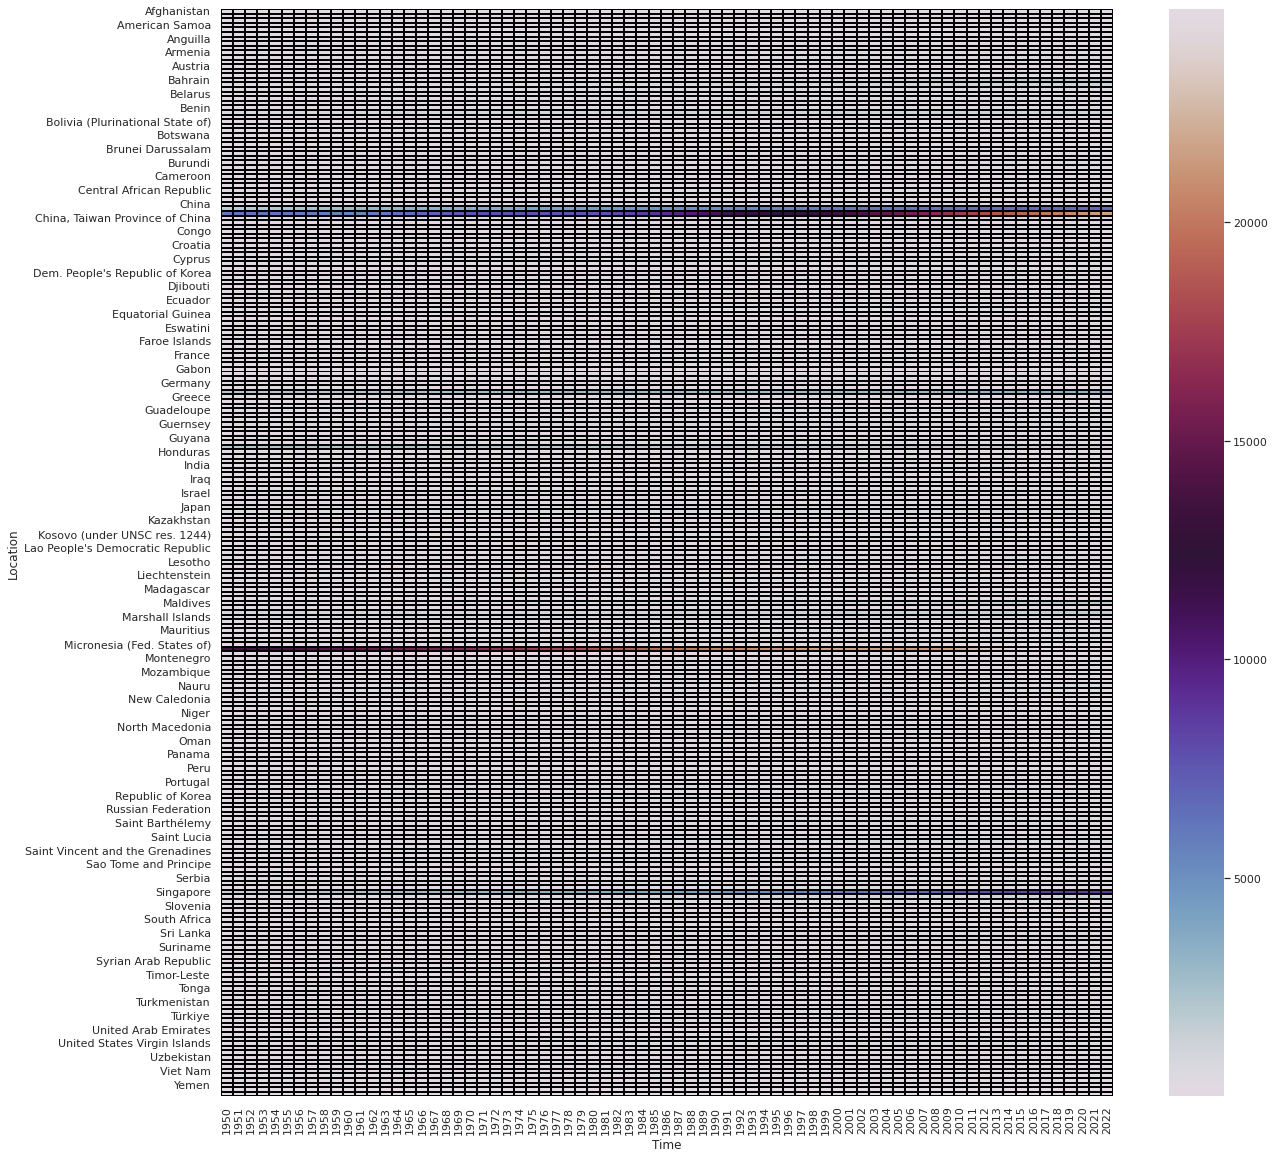

In [46]:
pop_density = pop[['Time','PopDensity','Location']].pivot(columns='Time',index='Location',values='PopDensity')
#pop_density.head(1)
plt.figure(figsize=(20,20))
sns.heatmap(pop_density,cmap="twilight",linewidths=1,linecolor='black');

In [47]:
top_dens = pop_density.sort_values(by=[2022],ascending=0)
print('Looks like ',top_dens.first_valid_index(),' has always been densely populated.\nWith it increasing over the years with', top_dens.loc[top_dens.first_valid_index(),2022],' people/km2 in year 2022 ')
#top_dens.head(2)

Looks like  Monaco  has always been densely populated.
With it increasing over the years with 24475.8389  people/km2 in year 2022 


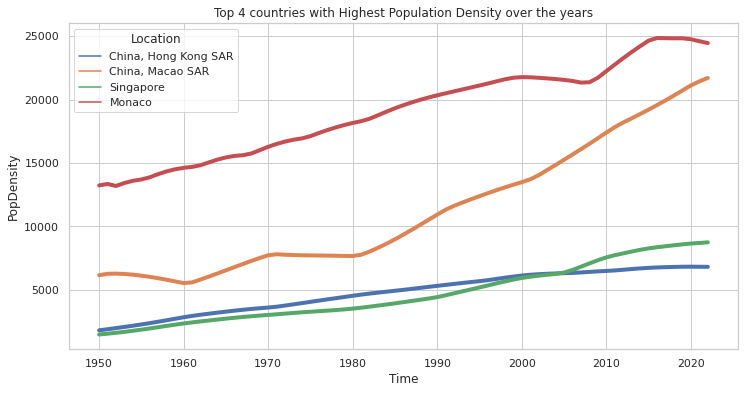

In [48]:
plt.figure(figsize=(12,6))
plt.title('Top 4 countries with Highest Population Density over the years' )

loc_list = top_dens.head(4).index
pop1 = pop[pop.Location.isin(loc_list)][['Location','Time','PopDensity']]

sns.lineplot(x=pop1.Time, y=pop1.PopDensity,hue = pop1.Location,linewidth = 4);

### How many people have ever lived on earth in time period (1950 - 2022) ?


In [49]:
total_birth = pop['Births'].sum()
total_birth

9253576.023999998

###### Insight

About 92 billion humans have lived on earth during time period (1950 - 2022)  

In [50]:
birth_2022 = pop_2022[['Births']].sum()
Current_births_to_total_births = birth_2022/total_birth *100
Current_births_to_total_births

Births    1.447987
dtype: float64

 ###### Insight

New births in 2022 is only 1.45% of all people who have ever lived on planet Earth (for time period 1950 - 2022).

***

<a id = 'mperf' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" >Gender Ratio</h1>

***

In [51]:
#world population dataframe for year 2022
pop_fm = pop_2022[['Location','PopSexRatio']].set_index('Location')
pop_fm = pop_fm.sort_values('PopSexRatio',ascending=False).head(10)

In [52]:
 # highest gender ratio  over the year
dat2 = pop[pop.Location.isin(pop_fm.index.unique())]

px.bar(dat2,x="Location",y="PopSexRatio",color="Location",animation_group="Location",
       animation_frame="Time",range_y=[0,320],color_discrete_sequence=px.colors.sequential.matter,
       title = 'Gender ratio over the years'  )

# plt.figure(figsize=(12,5))
# plt.title('Male vs Female ratio of Population (2022)') 
# plt.xticks(rotation=90)
# sns.barplot(x=pop_fm.index,y=pop_fm.M_per_100F_ratio,palette='twilight_r' );

###### Insight
The high Gender Ratio is in Qatar and UAE in 2022 is 263.77 and 226.3005 males per 100 females respectively.

*** 

<a id = 'MR' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" >Migration Rate</h1>

***

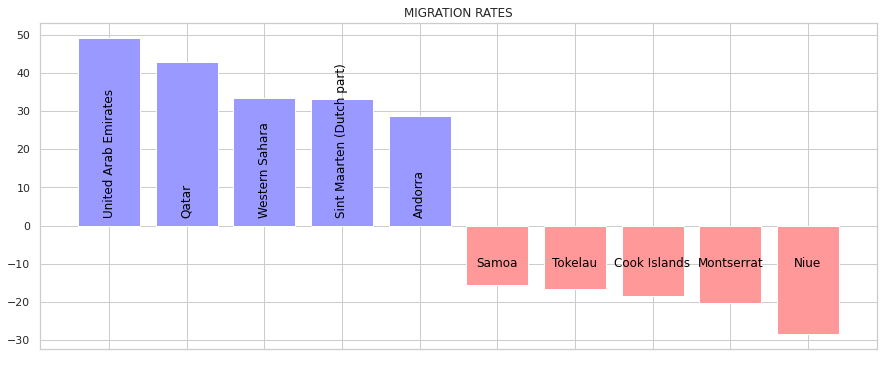

In [53]:
nmr = pop[['Location','CNMR']].groupby(by=['Location'])[['CNMR']].mean()
nmr1=nmr.sort_values(by=['CNMR'],ascending=False).head(5)
nmr2=nmr.sort_values(by=['CNMR'],ascending=False).tail(5)

plt.figure(figsize=(15,6))
plt.title('MIGRATION RATES')

plt.bar(x=nmr1.index,height=nmr1.CNMR,color='#9999ff')
plt.bar(x=nmr2.index,height=nmr2.CNMR,color='#ff9999')
plt.xticks(color='w')

for x,y in zip(np.linspace(0,4,5),list(nmr1.index)) :
    plt.text(x,2,y, ha='center', va= 'bottom',color='black', rotation = 90 )
for x,y in zip(np.linspace(5,9,5),list(nmr2.index) ) :
    plt.text(x, -10 ,y, ha='center', va= 'center',color='black', )

plt.show();

##### Insight

Migration rate and Gender Ratio seems to be high in UAE and Qatar.

It can be said that due to high number of male immigrants to the UAE and Qatar, as the majority of available jobs are male dominated, gender imbalance is higher than the rest of the world.

*** 

<a id = 'FR' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" > FERTILITY RATES</h1>

***

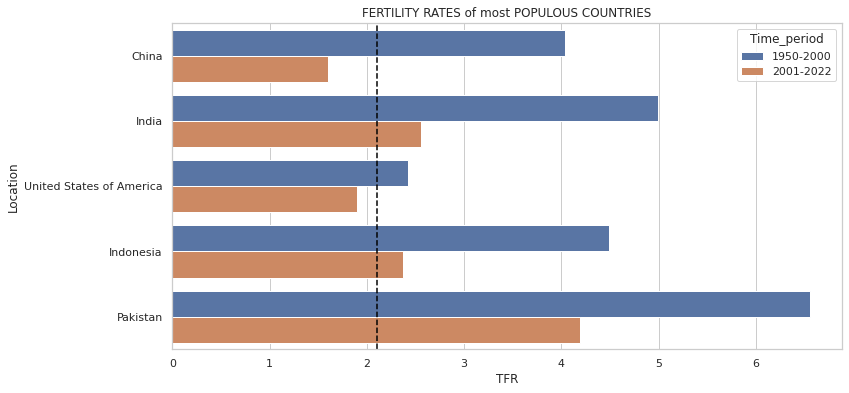

In [54]:
year_ftr = 2000
pop_int = pop[['Time','Location','TPopulation1July','TFR']].copy()
pop5 = largest_pop.head(5).Location #most populous country in year 2022

pop_int = pop_int[pop_int.Location.isin(pop5)]
pop_int['Time_grp'] = pop_int.Time>year_ftr
pop_int.head(5)

dic = {} 
grp=[]
loc=[]
tfr=[]
for c in pop5:
    popi = pop_int[pop_int.Location == c]
    TFR1= popi[popi.Time_grp == 0].TFR.mean()
    TFR2= popi[popi.Time_grp == 1].TFR.mean()
    loc.append(c)
    loc.append(c)
    tfr.append(TFR1)
    tfr.append(TFR2)
    grp.append('1950-'+str(year_ftr))
    grp.append(str(year_ftr+1)+'-2022')
    
dic['Location'] = loc
dic['TFR'] = tfr
dic['Time_period'] =grp
    
pop_tfr_mean = pd.DataFrame(dic)

plt.figure(figsize=(12,6))
plt.title('FERTILITY RATES of most POPULOUS COUNTRIES')
plt.axvline(x=2.1, color='black', linestyle = 'dashed')
sns.barplot(x=pop_tfr_mean.TFR, y=pop_tfr_mean.Location, hue = pop_tfr_mean.Time_period);

##### Insight

Replacement level fertility is the level of fertility at which a population exactly replaces itself from one generation to the next.

In developed countries, replacement level fertility can be taken as requiring an average of 2.1 children per woman.

Looking at the graph, China and US fall below this point in 21st century.


*** 

<a id = 'FP' ></a>
<h1 style="color: #003333; text-align:center; font-size:3em" > Effective Family Planning</h1>

***
The best family planning programs in the Third World are in East Asia: Taiwan, Singapore, South Korea, China, and Hong Kong. 
(Source : https://pubmed.ncbi.nlm.nih.gov/12281360/)

Note: I do not condone any inhumane practice

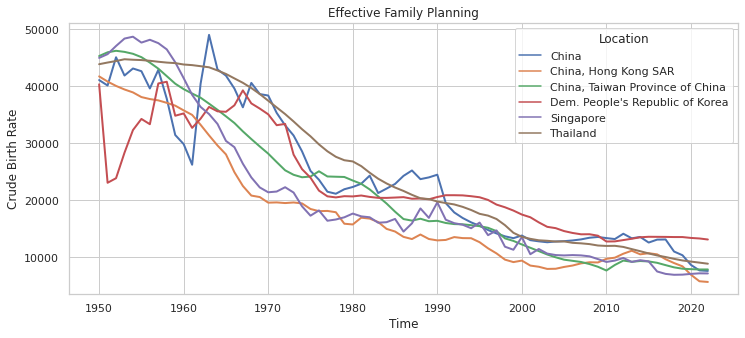

In [55]:
loc = 'Thailand','China','China, Hong Kong SAR',"Dem. People's Republic of Korea",'Singapore','China, Taiwan Province of China'
pop1 = pop[pop.Location.isin(loc)][['Location','Time','CBR']]

plt.figure(figsize=(12,5))
plt.title('Effective Family Planning')
plt.ylabel('Crude Birth Rate')
sns.lineplot(x=pop1.Time, y=pop1.CBR*1000,hue = pop1.Location,linewidth = 2);

###### Insight
Birth Rate has decreased over the years.

In [56]:
px.choropleth(pop.sort_values('Time'), 
              locations = 'ISO3_code',
              color="Births1519",
              animation_frame='Time',
              color_continuous_scale ='aggrnyl', 
              title='Teen Pregnancy throughout history' ,
              height=500)

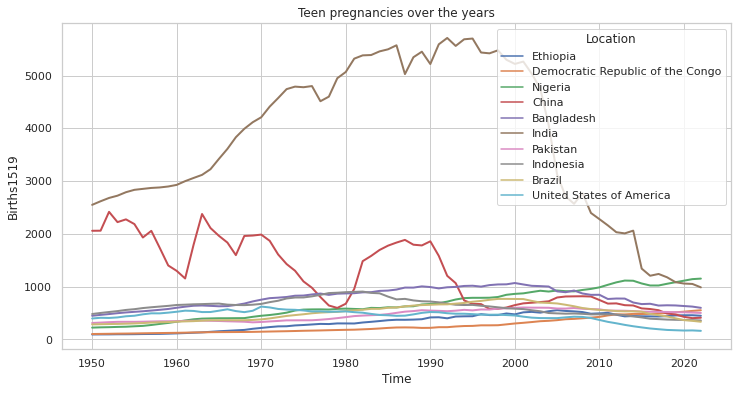

In [57]:

loc = (pop.groupby('Location')[['Births1519']].max().sort_values('Births1519').tail(10)).index
dat2 = pop[pop.Location.isin(loc)]
# px.bar(dat2,x="ISO3_code",y="Births1519",color="Location",animation_group="Location",
#        animation_frame="Time",color_discrete_sequence=px.colors.sequential.matter,
#        hover_name='Location',
#        title = 'Teen pregnancies over the years'  )

plt.figure(figsize=(12,6))
plt.title('Teen pregnancies over the years' )

sns.lineplot(x=dat2.Time, y=dat2.Births1519,hue = dat2.Location,linewidth = 2);

###### Insight
Highest teen pregnancy in 2022 is seen in Nigeria and India.
 
India saw a decline in 21st century 
   * Prohibition of Child Marriage Act (2006)
   
China, it can be seen declining
   * legal marriage age in China is 20 for women
   * 'unwed' pregnant women fall under the "zero-child policy" category
   
Nigeria's numbers are increasing 
   * due to lack of education, resources, unemployment


Thank you for following along.